In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math, copy
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

ModuleNotFoundError: No module named 'lab_utils'

In [105]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv('C:/Users/julio/Desktop/Proyectos/package-python-gradient-descent-1/csv initial/ex1data1.txt')
data.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [106]:
x_train = data['x'].values
y_train = data['y'].values

In [107]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [108]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [109]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [112]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 6.74e+00  dj_dw: -6.533e+01, dj_db: -5.839e+00   w:  6.533e-01, b: 5.83914e-02
Iteration 1000: Cost 4.52e+00  dj_dw: -1.185e-02, dj_db:  1.180e-01   w:  1.127e+00, b:-3.24258e+00
Iteration 2000: Cost 4.48e+00  dj_dw: -1.951e-03, dj_db:  1.942e-02   w:  1.182e+00, b:-3.78826e+00
Iteration 3000: Cost 4.48e+00  dj_dw: -3.211e-04, dj_db:  3.196e-03   w:  1.191e+00, b:-3.87808e+00
Iteration 4000: Cost 4.48e+00  dj_dw: -5.285e-05, dj_db:  5.261e-04   w:  1.193e+00, b:-3.89287e+00
Iteration 5000: Cost 4.48e+00  dj_dw: -8.699e-06, dj_db:  8.659e-05   w:  1.193e+00, b:-3.89530e+00
Iteration 6000: Cost 4.48e+00  dj_dw: -1.432e-06, dj_db:  1.425e-05   w:  1.193e+00, b:-3.89570e+00
Iteration 7000: Cost 4.48e+00  dj_dw: -2.357e-07, dj_db:  2.346e-06   w:  1.193e+00, b:-3.89577e+00
Iteration 8000: Cost 4.48e+00  dj_dw: -3.880e-08, dj_db:  3.862e-07   w:  1.193e+00, b:-3.89578e+00
Iteration 9000: Cost 4.48e+00  dj_dw: -6.386e-09, dj_db:  6.356e-08   w:  1.193e+00, b:-3.89578e+00


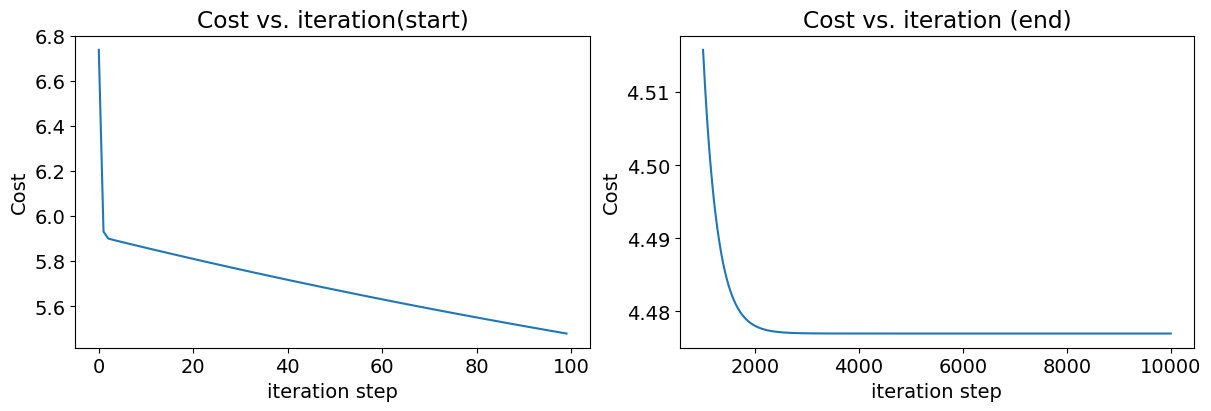

In [113]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

NameError: name 'plt_contour_wgrad' is not defined

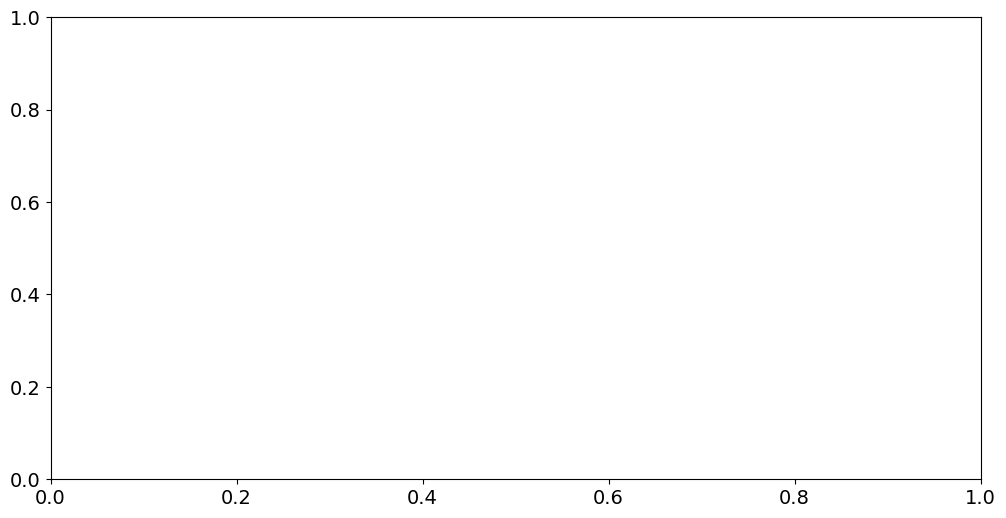

In [114]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)